In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random as rd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import os

In [2]:
df = pd.read_csv('/home/josh/Documents/dsi/caps/cap1/data/epl_cleaned.csv')
df = df.iloc[:,1:]

In [3]:
working_df = df.copy()
working_df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,ref_name
0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,17.0,...,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,Rob Harris
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,17.0,...,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,Graham Barber
2,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,6.0,...,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,Barry Knight
3,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,6.0,...,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,Andy D'Urso
4,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,17.0,...,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,Dermot Gallagher


In [4]:
def create_ref_df(df):
    ref_df = df.groupby('ref_name').sum()
    ref_df['Games_reffed'] = df.ref_name.value_counts()
    ref_df.reset_index(inplace=True)
    return ref_df

In [5]:
totrefs = create_ref_df(working_df)

In [8]:
twothirds = int(len(totrefs.HY)*(2/3))

In [20]:
HY_train = np.array(totrefs.HY)[:twothirds]
HY_test = np.array(totrefs.HY)[twothirds+1:]

In [28]:
AY_train = np.array(totrefs.AY)[:twothirds]
AY_test = np.array(totrefs.AY)[twothirds+1:]

In [29]:
regr = linear_model.LinearRegression()

In [30]:
regr.fit(HY_train.reshape(-1,1),AY_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
iabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [31]:
yellow_y_pred = regr.predict(HY_test.reshape(-1,1))

In [32]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(AY_test.reshape(-1,1), yellow_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(AY_test.reshape(-1,1), yellow_y_pred))

Coefficients: 
 [[1.14581774]]
Mean squared error: 1255.15
Coefficient of determination: 0.96


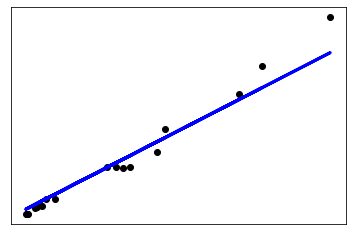

In [33]:
plt.scatter(HY_test, AY_test,  color='black')
plt.plot(HY_test, yellow_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()